<a href="https://colab.research.google.com/github/AaronAllStar/data-analysis/blob/main/Trabajo_Grupal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Grupal 1

Materia: Introducción a las ciencias de datos

Profesor: Alejandro Zamora

Integrantes: María Arias, Aaron Medrano, Julián Solano

**1) Conocimiento del dataset**

•	Contexto: Datos de jugadores en partidos (dataset vinculado a World Cup /
partidos), con registros por jugador en eventos/partidos.

•	Dimensiones: 37,784 filas y 9 columnas.

•	Columnas (principales / primeras): RoundID, MatchID, Team Initials, Coach Name, Line-up, Shirt Number, Player Name, Position, Event.


**2) Exploración inicial**

**•	Tipos de variables:**

  Columnas numéricas detectadas: 3 (varias métricas numéricas).
  Columnas categóricas/texto: 6 (p. ej. Player Name, Coach Name, Team Initials, Line-up, Position, Event).

**•	Valores faltantes:**

  Position tiene 33,641 valores faltantes.
  Event tiene 28,715 valores faltantes.
  Las demás columnas (RoundID, MatchID, Team Initials, Coach Name, Line-up, Shirt Number, Player Name) no muestran faltantes significativos.

**•	Observaciones / datos poco confiables:**

  Muchas filas no tienen Position ni Event, lo que sugiere que el dataset reúne distintos tipos de registros (algunos con detalle de evento y otros solo con plantilla/line-up).
  Hay redundancia posible en columnas tipo Line-up que puede contener cadenas largas (listados de jugadores).

**•	Patrones detectados rápidamente:**

  El dataset es muy centrado en identificadores de partido/equipo y en plantillas; no hay columnas típicas de FIFA (por ejemplo overall, potential, age) en este archivo concreto, por lo que los análisis sobre “calidad” del jugador no son aplicables aquí sin combinar con otro dataset.


**3) Formulación de preguntas (mínimo 3)**


1.	¿Qué proporción de registros corresponde a jugadores listados en la alineación (Line-up) frente a registros de eventos (Event)?

2.	¿Qué equipos (por Team Initials) aparecen con más frecuencia en el dataset?

3.	¿Se pueden extraer patrones temporales por RoundID / MatchID (p. ej. mayor número de eventos en determinadas rondas)?
(Extras) Si tuviéramos la columna Position completa: ¿qué posiciones aparecen con más frecuencia por equipo?


1. Importar las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Leer el csv

In [24]:
df_fifa = pd.read_csv("https://raw.githubusercontent.com/AaronAllStar/data-analysis/refs/heads/main/FIFA%20(2)/WorldCupPlayers.csv")
#df_fifa.head() #Entrega los primeros 5
df_fifa.tail(30) #Entrega los últimos 5

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37754,255959,300186501,GER,LOEW Joachim (GER),S,18,KROOS,NaN,NaN
37755,255959,300186501,ARG,SABELLA Alejandro (ARG),S,15,DEMICHELIS,NaN,NaN
37756,255959,300186501,GER,LOEW Joachim (GER),S,20,BOATENG,NaN,NaN
37757,255959,300186501,ARG,SABELLA Alejandro (ARG),S,16,ROJO,NaN,NaN
37758,255959,300186501,GER,LOEW Joachim (GER),S,23,KRAMER,NaN,O31'
37759,255959,300186501,ARG,SABELLA Alejandro (ARG),S,22,LAVEZZI,NaN,OH46'
37760,255959,300186501,GER,LOEW Joachim (GER),N,12,ZIELER,GK,NaN
37761,255959,300186501,ARG,SABELLA Alejandro (ARG),N,12,ORION,GK,NaN
37762,255959,300186501,GER,LOEW Joachim (GER),N,22,WEIDENFELLER,GK,NaN
37763,255959,300186501,ARG,SABELLA Alejandro (ARG),N,21,ANDUJAR,GK,NaN


3. Inicio de utilizar pandas (valores nulos y y tipos de datos)

In [ ]:
# Verificar si hay valores nulos en cada columna
print("Missing values before cleaning:")
print(df.isnull().sum())

# Mostrar los tipos de datos de cada columna
print("\nData types:")
print(df.dtypes)



Missing values before cleaning:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Data types:
RoundID           int64
MatchID           int64
Team Initials    object
Coach Name       object
Line-up          object
Shirt Number      int64
Player Name      object
Position         object
Event            object
dtype: object

Missing values after removing rows with null Position:
RoundID             0
MatchID             0
Team Initials       0
Coach Name          0
Line-up             0
Shirt Number        0
Player Name         0
Position            0
Event            3570
dtype: int64

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 4143 entries, 0 to 37763
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID      

4. Añadir posición a los jugadores

In [ ]:
# Fill missing values in 'Position' with 'MF/ST'
df['Position'].fillna('MF/ST', inplace=True)

# Verify the changes
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
RoundID             0
MatchID             0
Team Initials       0
Coach Name          0
Line-up             0
Shirt Number        0
Player Name         0
Position            0
Event            3570
dtype: int64


/tmp/ipython-input-3501181911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Position'].fillna('MF/ST', inplace=True)


5. Limpieza de datos con pandas

In [ ]:
df.dropna(subset=['Position'], inplace=True)

# Convertir la columna 'Shirt Number' a tipo entero, manejando posibles errores
df['Shirt Number'] = pd.to_numeric(df['Shirt Number'], errors='coerce').fillna(0).astype(int)

# Verificar si hay valores nulos después de eliminar filas
print("\nMissing values after removing rows with null Position:")
print(df.isnull().sum())

# Mostrar información del DataFrame después de la limpieza
print("\nDataFrame Info after cleaning:")
df.info()


Missing values after removing rows with null Position:
RoundID             0
MatchID             0
Team Initials       0
Coach Name          0
Line-up             0
Shirt Number        0
Player Name         0
Position            0
Event            3570
dtype: int64

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 4143 entries, 0 to 37763
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        4143 non-null   int64 
 1   MatchID        4143 non-null   int64 
 2   Team Initials  4143 non-null   object
 3   Coach Name     4143 non-null   object
 4   Line-up        4143 non-null   object
 5   Shirt Number   4143 non-null   int64 
 6   Player Name    4143 non-null   object
 7   Position       4143 non-null   object
 8   Event          573 non-null    object
dtypes: int64(3), object(6)
memory usage: 323.7+ KB


#Preguntas y respuestas

1. ¿Qué categorías o valores aparecen con mayor frecuencia?

In [ ]:
for column in df.columns:
    print(f"\nMost frequent values in '{column}':")
    print(df[column].value_counts().head())


Most frequent values in 'RoundID':
RoundID
255931      369
249722      354
43950100    289
97410100    259
1014        196
Name: count, dtype: int64

Most frequent values in 'MatchID':
MatchID
300186497    16
300186460    16
300186461    16
300186488    16
300186502    16
Name: count, dtype: int64

Most frequent values in 'Team Initials':
Team Initials
BRA    253
ARG    213
ITA    180
NED    152
FRG    151
Name: count, dtype: int64

Most frequent values in 'Coach Name':
Coach Name
SCOLARI Luiz Felipe (BRA)        82
LOEW Joachim (GER)               72
SCHOEN Helmut (FRG)              72
PARREIRA Carlos Alberto (BRA)    55
TABAREZ Oscar (URU)              54
Name: count, dtype: int64

Most frequent values in 'Line-up':
Line-up
S    3214
N     929
Name: count, dtype: int64

Most frequent values in 'Shirt Number':
Shirt Number
1     1293
12     350
0      284
22     276
10     207
Name: count, dtype: int64

Most frequent values in 'Player Name':
Player Name
Sepp MAIER    19
TAFFAREL     

2. ¿Qué variable parece tener más influencia sobre el resultado principal?

In [ ]:
# La columna 'Event' parece ser la más relevante para los resultados en el juego.
# Analicemos la frecuencia de los diferentes eventos.
print("\nFrecuencia de eventos:")
print(df['Event'].value_counts().head())

# Se necesitaría un análisis más profundo para determinar la influencia real de cada variable en los resultados de los partidos.
# Esto podría implicar buscar correlaciones entre las variables y los resultados de los partidos (si están disponibles),
# o construir modelos predictivos.


Frecuencia de eventos:
Event
Y90'     16
Y1'      14
OH46'    12
Y65'      6
O46'      6
Name: count, dtype: int64


**3**. ¿Cuál es el número de camiseta promedio de los jugadores en el dataset?

In [ ]:
import numpy as np

# Calculate the average shirt number using numpy's mean function and convert to integer
average_shirt_number = np.mean(df['Shirt Number']).astype(int)

print(f"El promedio del número de camiseta es: {average_shirt_number}")

El promedio del número de camiseta es: 7


**4.** ¿Qué porcentaje de Número de camiseta es mayor al promedio?

In [ ]:
# Contar el número de jugadores con un número de camiseta mayor que el promedio
players_above_average = np.sum(df['Shirt Number'] > average_shirt_number)

# Calcular el porcentaje
percentage_above_average = (players_above_average / len(df)) * 100

print(f"El porcentaje de jugadores con un número de camiseta superior al promedio ({average_shirt_number:.2f}) es: {percentage_above_average:.2f}%")

El porcentaje de jugadores con un número de camiseta superior al promedio (7.00) es: 43.64%


5. ¿Se pueden extraer patrones temporales por RoundID / MatchID (p. ej. mayor número de eventos en determinadas rondas)? (Extras) Si tuviéramos la columna Position completa: ¿qué posiciones aparecen con más frecuencia por equipo?

In [25]:
# Análisis de patrones temporales por RoundID (conteo de eventos por ronda)
print("Número de eventos por RoundID:")
events_per_round = df.groupby('RoundID')['Event'].count().sort_values(ascending=False)
print(events_per_round.head())

# Análisis de posiciones más frecuentes por equipo
print("\nPosiciones más frecuentes por equipo:")
# Agrupar por equipo y posición, contar ocurrencias y encontrar la posición más frecuente por equipo
most_frequent_position_by_team = df.groupby('Team Initials')['Position'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
print(most_frequent_position_by_team.head())

Número de eventos por RoundID:
RoundID
97410100    51
255931      44
249722      39
43950100    39
1014        38
Name: Event, dtype: int64

Posiciones más frecuentes por equipo:
Team Initials
ALG    GK
ANG    GK
ARG    GK
AUS    GK
AUT    GK
Name: Position, dtype: object


6. ¿Qué proporción de registros corresponde a jugadores listados en la alineación (Line-up) frente a registros de eventos (Event)?

In [27]:
# Contar el número total de registros
total_records = len(df)

# Contar el número de registros con jugadores en la alineación (Line-up = 'S')
lineup_records = df[df['Line-up'] == 'S'].shape[0]

# Contar el número de registros con eventos (Event no nulo)
event_records = df.dropna(subset=['Event']).shape[0]

# Calcular las proporciones
proportion_lineup = (lineup_records / total_records) * 100
proportion_event = (event_records / total_records) * 100

print(f"Proporción de registros de jugadores en la alineación: {proportion_lineup:.2f}%")
print(f"Proporción de registros con eventos: {proportion_event:.2f}%")

Proporción de registros de jugadores en la alineación: 77.58%
Proporción de registros con eventos: 13.83%


#Creación de gráficos

1. Gráfica 1: Distribución de jugadores por posición

/tmp/ipython-input-2838573270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Position', palette='viridis') # Crear el gráfico de conteo


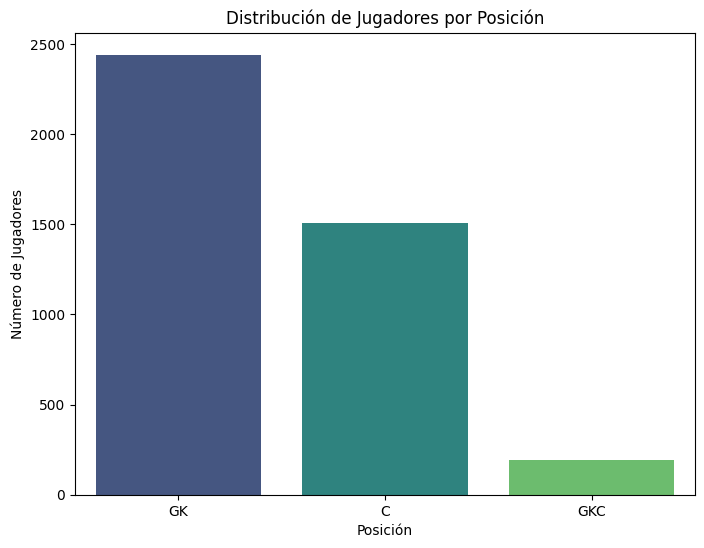

In [ ]:
# Crear un gráfico de barras para visualizar la distribución de jugadores por posición.
plt.figure(figsize=(8, 6)) # Definir el tamaño de la figura
sns.countplot(data=df, x='Position', hue='Position', palette='viridis', legend=False) # Crear el gráfico de conteo, usando 'Position' para el hue y deshabilitando la leyenda
plt.title('Distribución de Jugadores por Posición') # Establecer el título del gráfico
plt.xlabel('Posición') # Establecer la etiqueta del eje x
plt.ylabel('Número de Jugadores') # Establecer la etiqueta del eje y
plt.show() # Mostrar el gráfico

Gráfica 2: Distribución de Jugadores por Equipo (Top 10)

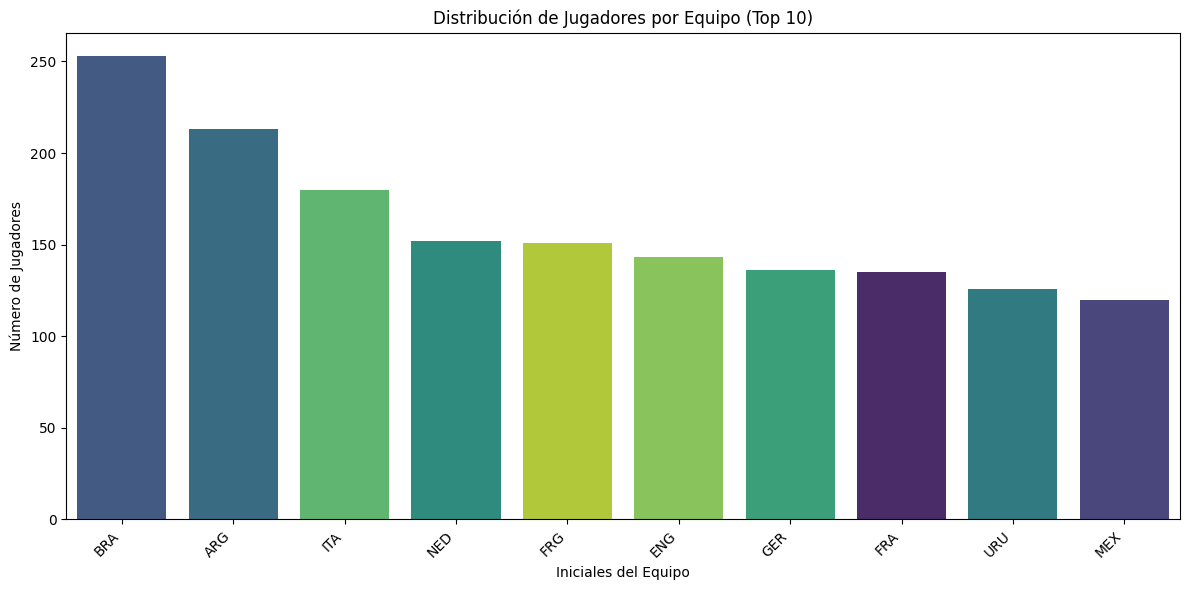

In [ ]:
# Obtener los 10 equipos con más jugadores
top_teams = df['Team Initials'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los jugadores de los equipos principales
df_top_teams = df[df['Team Initials'].isin(top_teams)]

# Crear un gráfico de barras para visualizar la distribución de jugadores por equipo
plt.figure(figsize=(12, 6)) # Definir el tamaño de la figura
sns.countplot(data=df_top_teams, x='Team Initials', order=top_teams, palette='viridis', hue='Team Initials', legend=False) # Crear el gráfico de conteo
plt.title('Distribución de Jugadores por Equipo (Top 10)') # Establecer el título del gráfico
plt.xlabel('Iniciales del Equipo') # Establecer la etiqueta del eje x
plt.ylabel('Número de Jugadores') # Establecer la etiqueta del eje y
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar la superposición de etiquetas
plt.show() # Mostrar el gráfico

Gráfica 3: Proporción de Registros por Tipo

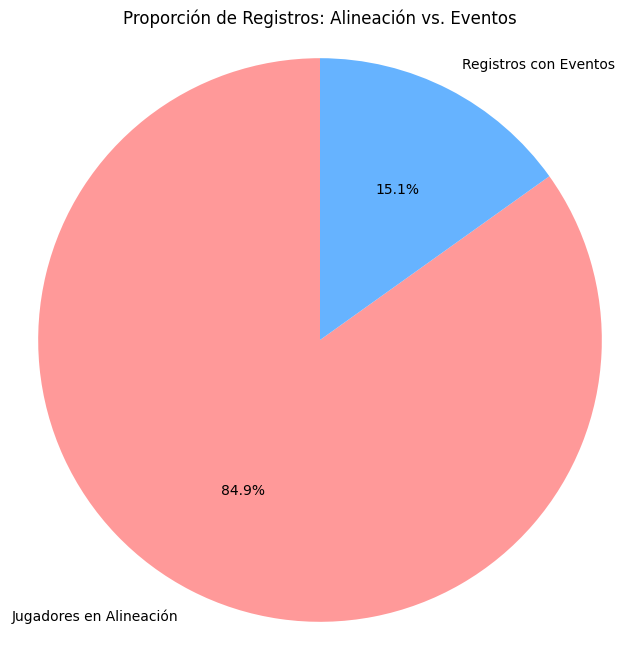

In [28]:
# Crear etiquetas y tamaños para el gráfico de pastel
labels = ['Jugadores en Alineación', 'Registros con Eventos']
sizes = [proportion_lineup, proportion_event]
colors = ['#ff9999','#66b3ff'] # Colores para las secciones

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8)) # Definir el tamaño de la figura
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) # Crear el gráfico de pastel
plt.title('Proporción de Registros: Alineación vs. Eventos') # Establecer el título
plt.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo.
plt.show() # Mostrar el gráfico

**5) Conclusiones y reflexión**

**•	¿Qué aprendí al explorar este dataset?**
El archivo contiene registros de jugadores por partido/plantilla para competiciones (World Cup). Es fuerte en metadatos de partido (RoundID, MatchID, Team Initials) pero tiene muchos campos vacíos en columnas que describirían detalles de posición o eventos (Position, Event). Esto limita algunos análisis típicos sobre desempeño/atributos de jugadores.


**•	Resultados interesantes o inesperados:**
La cantidad de valores faltantes en Position y Event es alta (33k y 28k), lo que sugiere que el dataset mezcla filas con distinto nivel de granularidad (plantillas vs. eventos específicos). No existen columnas de “rating” en este CSV, por lo que no es comparable a los típicos datasets de FIFA Players que contienen overall, potential, age, etc.


**•	Si tuviera más tiempo o más datos, haría:**
o	Buscar/combinar con otro CSV de FIFA que tenga atributos por jugador (edad, overall, club, nacionalidad) y unir por Player Name para analizar desempeño/atributos.
o	Limpiar y reestructurar la columna Line-up para extraer los jugadores listados y normalizar Position.
o	Analizar eventos por MatchID y construir un contador de eventos por jugador (si Event se completa en otras filas).
